#Activity 1: Predictive modelling and dashboard development

In [244]:
# Load required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection  import train_test_split

# This is to remove warnings provided by the python libraries
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt

In [245]:
df_test = pd.read_csv('heart_disease_test_all.csv')  # Load the dataset
df_train = pd.read_csv('heart_disease_train.csv')  # Load the dataset

In [246]:
# Install python library for SHAP explainer toolbox
!pip install shap

In [247]:
!pip install lime

In [248]:
# import shap library
import shap

# Exploratory Analysis & pre processing

In [249]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              184 non-null    object 
 1   Age             184 non-null    int64  
 2   Gender          184 non-null    object 
 3   ChestPainType   184 non-null    object 
 4   RestingBP       184 non-null    int64  
 5   Cholesterol     184 non-null    int64  
 6   FastingBS       184 non-null    int64  
 7   RestingECG      184 non-null    object 
 8   MaxHR           184 non-null    int64  
 9   ExerciseAngina  184 non-null    object 
 10  Oldpeak         184 non-null    float64
 11  ST_Slope        184 non-null    object 
 12  HeartDisease    184 non-null    int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 18.8+ KB


In [250]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              734 non-null    object 
 1   Age             734 non-null    int64  
 2   Gender          734 non-null    object 
 3   ChestPainType   734 non-null    object 
 4   RestingBP       734 non-null    int64  
 5   Cholesterol     734 non-null    int64  
 6   FastingBS       734 non-null    int64  
 7   RestingECG      734 non-null    object 
 8   MaxHR           734 non-null    int64  
 9   ExerciseAngina  734 non-null    object 
 10  Oldpeak         734 non-null    float64
 11  ST_Slope        734 non-null    object 
 12  HeartDisease    734 non-null    int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 74.7+ KB


In [251]:
df_test.head()

Id  Age Gender ChestPainType  RestingBP  Cholesterol  FastingBS  \
0  PT1800   64      M           ASY        134          273          0   
1  PT1801   58      M           ASY        114          318          0   
2  PT1802   47      F           ATA        140          257          0   
3  PT1803   64      M           ASY        141          244          1   
4  PT1804   47      M           NAP        110            0          1   

  RestingECG  MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0     Normal    102              Y      4.0     Down             1  
1         ST    140              N      4.4     Down             1  
2     Normal    135              N      1.0       Up             0  
3         ST    116              Y      1.5     Flat             1  
4     Normal    120              Y      0.0     Flat             1

In [252]:
df_train.head()

Id  Age Gender ChestPainType  RestingBP  Cholesterol  FastingBS  \
0  PT1000   42      M           ATA        120          198          0   
1  PT1001   54      M           ASY        140          239          0   
2  PT1002   60      M           NAP        141          316          1   
3  PT1003   54      M           ASY        124          266          0   
4  PT1004   55      M           ATA        160          292          1   

  RestingECG  MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0     Normal    155              N      0.0       Up             0  
1     Normal    160              N      1.2       Up             0  
2         ST    122              Y      1.7     Flat             1  
3        LVH    109              Y      2.2     Flat             1  
4     Normal    143              Y      2.0     Flat             1

In [253]:
df_train['Gender'].unique()

array(['M', 'F'], dtype=object)

In [254]:
df_train['ChestPainType'].unique()

array(['ATA', 'ASY', 'NAP', 'TA'], dtype=object)

In [255]:
# List of specific columns you want to check for unique values
columns_to_check = [ 'ChestPainType']

# Get the number of unique values for the specified columns
unique_values_per_column = df_train[columns_to_check].nunique()

print(unique_values_per_column)


ChestPainType    4
dtype: int64


###Frequency distribution of values in variables

In [256]:
for col in columns_to_check:
    print(df_train[col].value_counts())

ChestPainType
ASY    403
NAP    162
ATA    134
TA      35
Name: count, dtype: int64


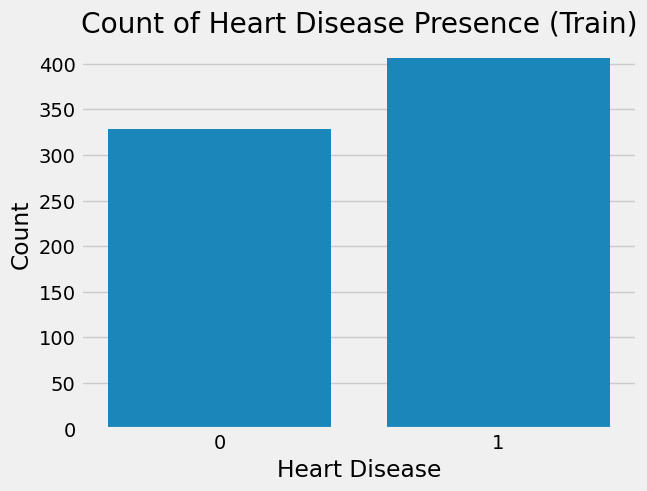

In [257]:
sns.countplot(data=df_train, x='HeartDisease')

# Set the title and labels
plt.title('Count of Heart Disease Presence (Train)')
plt.xlabel('Heart Disease')
plt.ylabel('Count')

# Display the plot
plt.show()

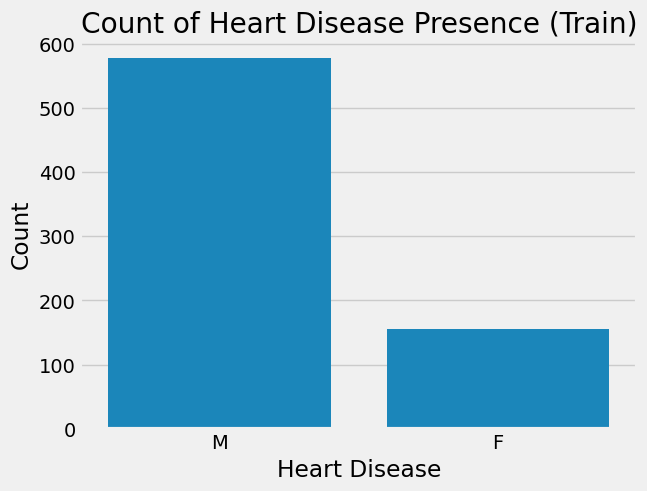

In [258]:
sns.countplot(data=df_train, x='Gender')

# Set the title and labels
plt.title('Count of Heart Disease Presence (Train)')
plt.xlabel('Heart Disease')
plt.ylabel('Count')

# Display the plot
plt.show()

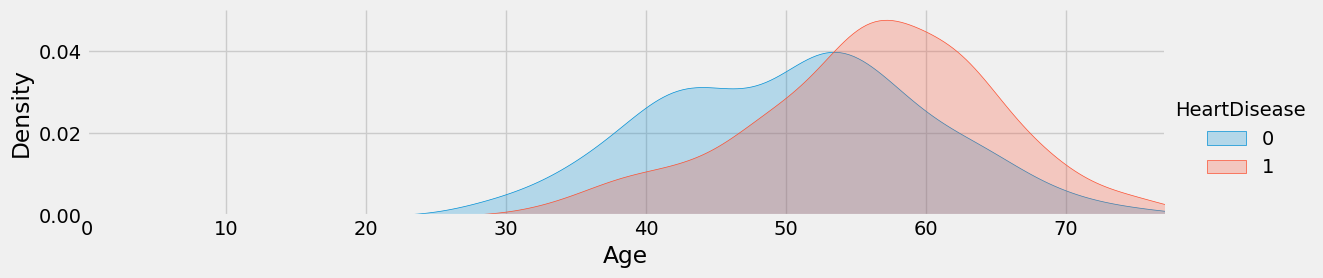

In [259]:
# Age distribution
facet = sns.FacetGrid(df_train, hue="HeartDisease",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df_train['Age'].max()))
facet.add_legend()

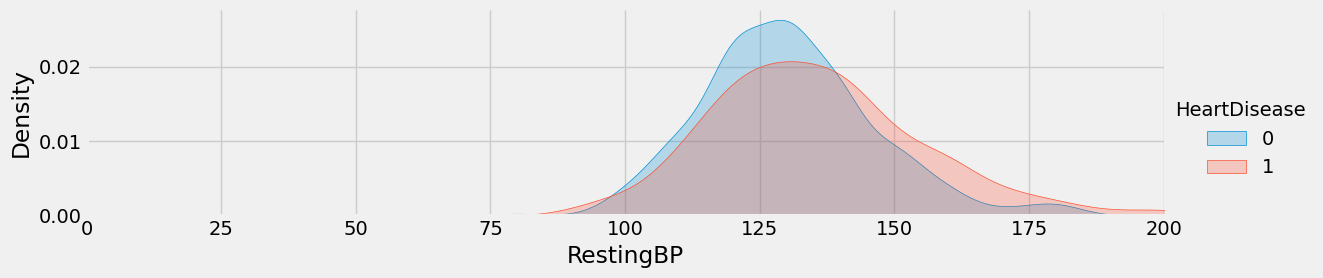

In [260]:
# RestingBP distribution
facet = sns.FacetGrid(df_train, hue="HeartDisease",aspect=4)
facet.map(sns.kdeplot,'RestingBP',shade= True)
facet.set(xlim=(0, df_train['RestingBP'].max()))
facet.add_legend()

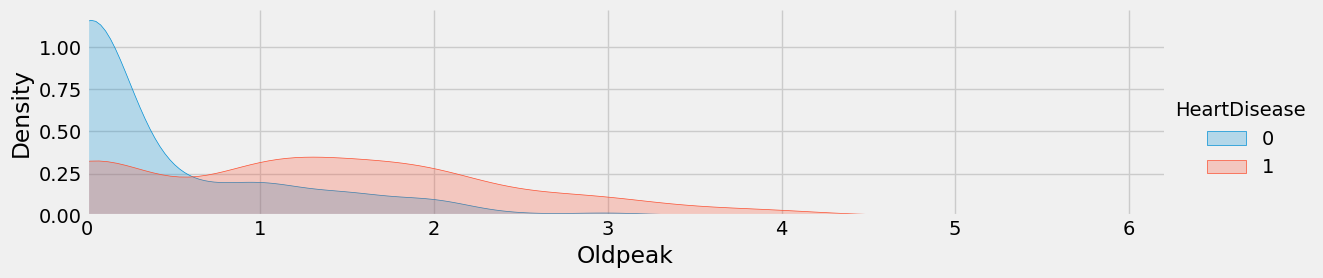

In [261]:
# Oldpeak distribution
facet = sns.FacetGrid(df_train, hue="HeartDisease",aspect=4)
facet.map(sns.kdeplot,'Oldpeak',shade= True)
facet.set(xlim=(0, df_train['Oldpeak'].max()))
facet.add_legend()

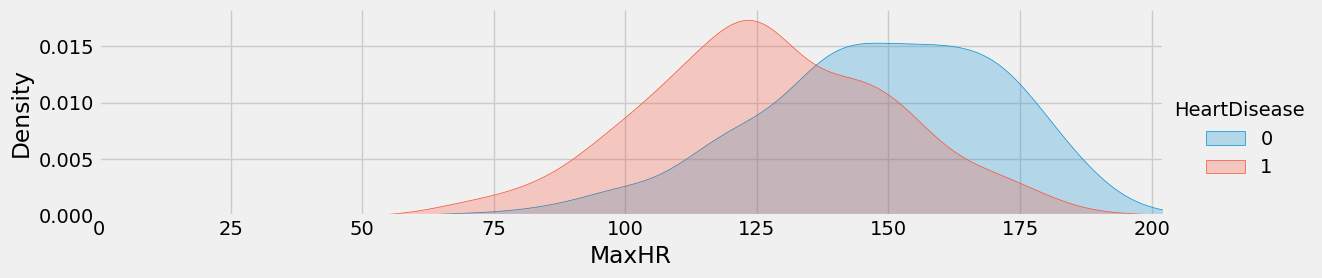

In [262]:
# MaxHR distribution
facet = sns.FacetGrid(df_train, hue="HeartDisease",aspect=4)
facet.map(sns.kdeplot,'MaxHR',shade= True)
facet.set(xlim=(0, df_train['MaxHR'].max()))
facet.add_legend()

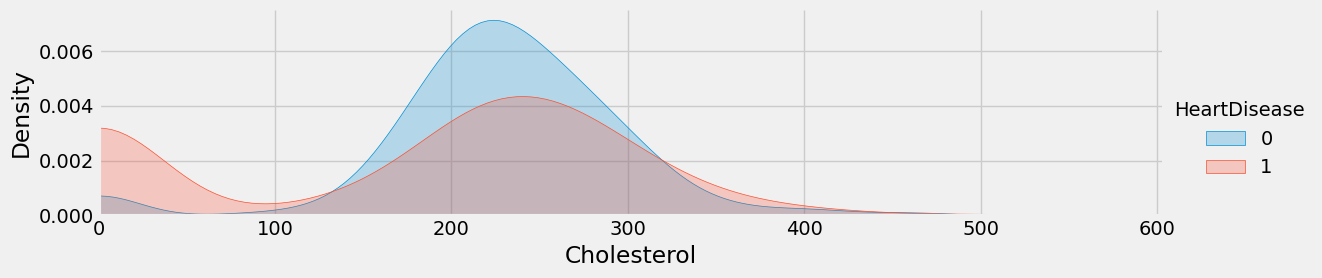

In [263]:
# Cholesterol distribution
facet = sns.FacetGrid(df_train, hue="HeartDisease",aspect=4)
facet.map(sns.kdeplot,'Cholesterol',shade= True)
facet.set(xlim=(0, df_train['Cholesterol'].max()))
facet.add_legend()

##Overall Analysis

In [264]:
df_concat = pd.concat([df_train, df_test])

In [265]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 0 to 183
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              918 non-null    object 
 1   Age             918 non-null    int64  
 2   Gender          918 non-null    object 
 3   ChestPainType   918 non-null    object 
 4   RestingBP       918 non-null    int64  
 5   Cholesterol     918 non-null    int64  
 6   FastingBS       918 non-null    int64  
 7   RestingECG      918 non-null    object 
 8   MaxHR           918 non-null    int64  
 9   ExerciseAngina  918 non-null    object 
 10  Oldpeak         918 non-null    float64
 11  ST_Slope        918 non-null    object 
 12  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 100.4+ KB


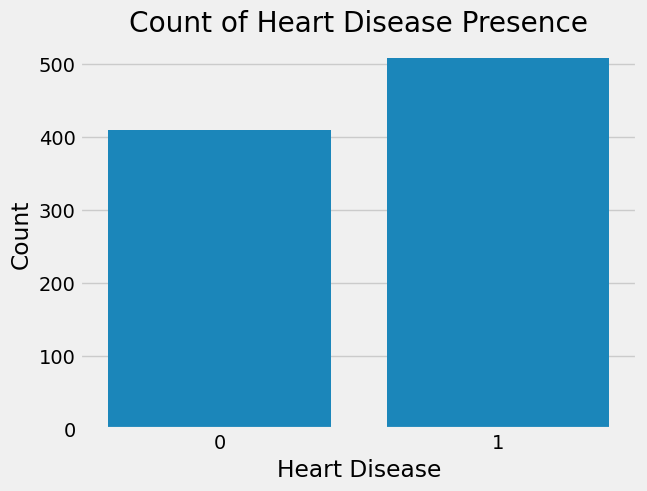

In [266]:
sns.countplot(data=df_concat, x='HeartDisease')

# Set the title and labels
plt.title('Count of Heart Disease Presence')
plt.xlabel('Heart Disease')
plt.ylabel('Count')

# Display the plot
plt.show()

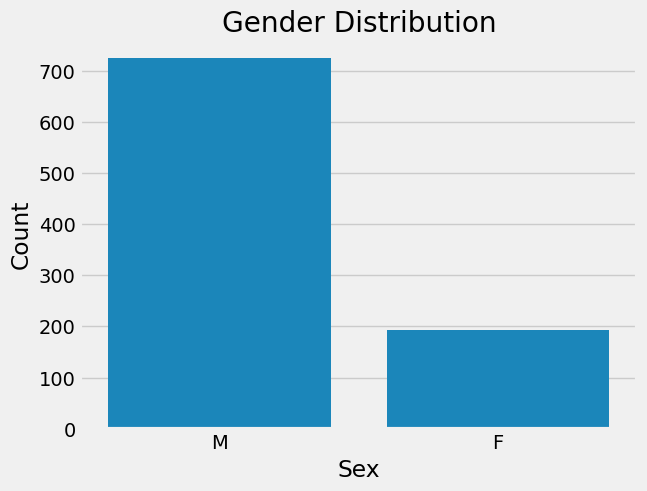

In [267]:
sns.countplot(data=df_concat, x='Gender')

# Set the title and labels
plt.title('Gender Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')

# Display the plot
plt.show()

In [268]:
df_concat['Gender'].value_counts()

Gender
M    725
F    193
Name: count, dtype: int64

In [269]:
df_concat['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

### Seperating the X & Y variables

In [270]:
train_x = df_train[['Age', 'Gender', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']]
train_y = df_train[['HeartDisease']]
test_x = df_test[['Age', 'Gender', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']]
test_y = df_test[['HeartDisease']]

### Calculating the skewness for all the continous variables.

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RestingBP'}>],
       [<Axes: title={'center': 'Cholesterol'}>,
        <Axes: title={'center': 'FastingBS'}>],
       [<Axes: title={'center': 'MaxHR'}>,
        <Axes: title={'center': 'Oldpeak'}>]], dtype=object)

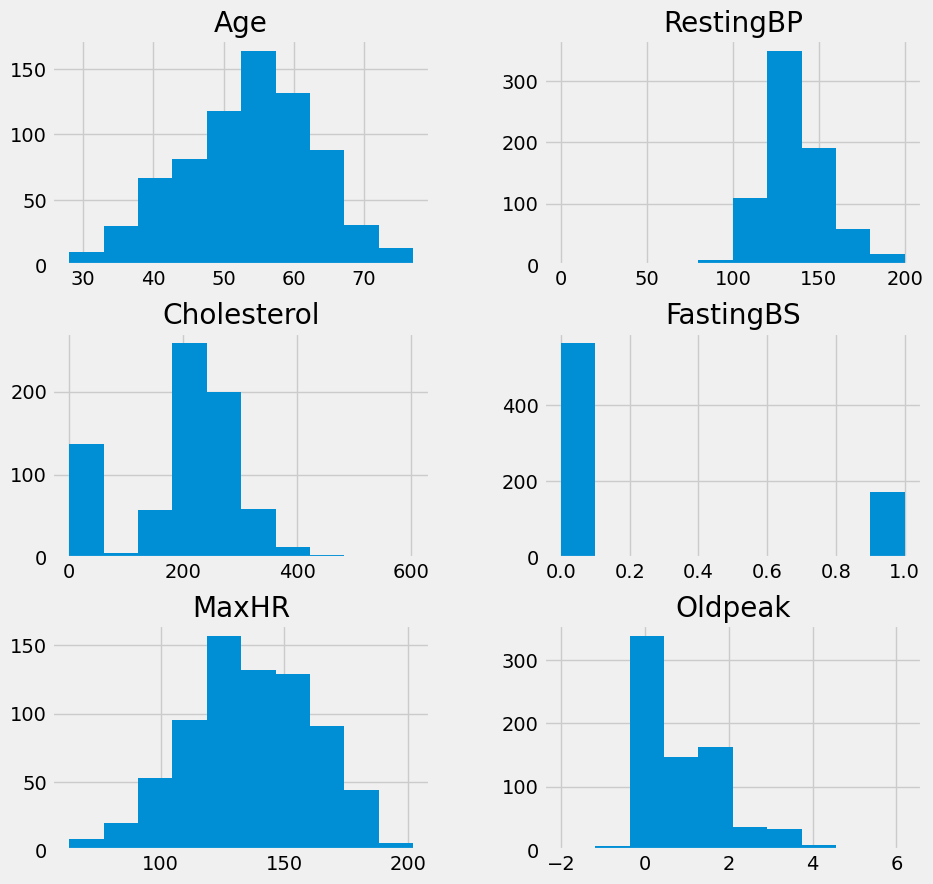

In [271]:
train_x.hist(figsize=(10, 10))

In [272]:
count_zero_cholesterol = (train_x['Cholesterol'] == 0).sum()
print(count_zero_cholesterol)

137


In [273]:
count_zero_cholesterol = (test_x['Cholesterol'] == 0).sum()
print(count_zero_cholesterol)

35


**We have identified that there are 172 records with a Cholesterol level of 0, which cannot be accurate under normal circumstances. This suggests the presence of missing values or data entry errors.**


In [274]:
# Combine the two data frames
mean_cal = pd.concat([train_x, test_x], ignore_index=True)
mean_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Gender          918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 79.0+ KB


In [275]:
# Calculate the mean of non-zero cholesterol values
mean = mean_cal[mean_cal['Cholesterol'] != 0]['Cholesterol'].mean()
mean

244.6353887399464

In [276]:
train_x['cholesterol_mean'] = train_x['Cholesterol'].replace(0, mean)
train_x['cholesterol_mean'].mean()

244.00006574573933

<Axes: >

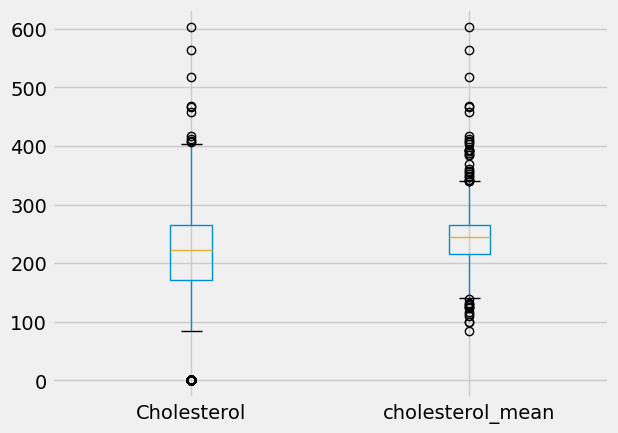

In [277]:
train_x.boxplot(column=['Cholesterol','cholesterol_mean'])

In [278]:
train_x = train_x.drop(columns=['Cholesterol'])
train_x.head()

Age Gender ChestPainType  RestingBP  FastingBS RestingECG  MaxHR  \
0   42      M           ATA        120          0     Normal    155   
1   54      M           ASY        140          0     Normal    160   
2   60      M           NAP        141          1         ST    122   
3   54      M           ASY        124          0        LVH    109   
4   55      M           ATA        160          1     Normal    143   

  ExerciseAngina  Oldpeak ST_Slope  cholesterol_mean  
0              N      0.0       Up             198.0  
1              N      1.2       Up             239.0  
2              Y      1.7     Flat             316.0  
3              Y      2.2     Flat             266.0  
4              Y      2.0     Flat             292.0

In [279]:
test_x['cholesterol_mean'] = test_x['Cholesterol'].replace(0, mean)
test_x['cholesterol_mean'].mean()

247.16977503205504

<Axes: >

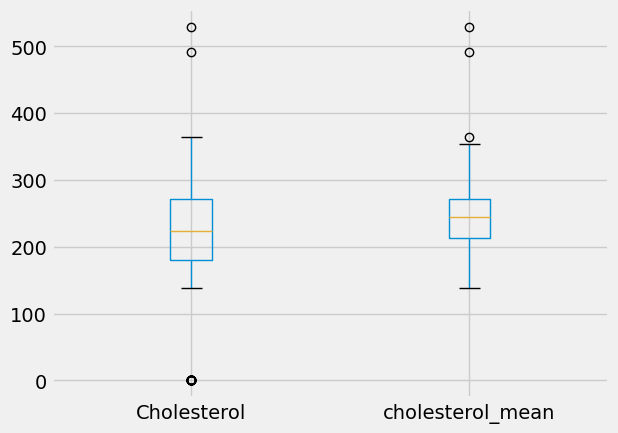

In [280]:
test_x.boxplot(column=['Cholesterol','cholesterol_mean'])

In [281]:
test_x = test_x.drop(columns=['Cholesterol'])
test_x.head()

Age Gender ChestPainType  RestingBP  FastingBS RestingECG  MaxHR  \
0   64      M           ASY        134          0     Normal    102   
1   58      M           ASY        114          0         ST    140   
2   47      F           ATA        140          0     Normal    135   
3   64      M           ASY        141          1         ST    116   
4   47      M           NAP        110          1     Normal    120   

  ExerciseAngina  Oldpeak ST_Slope  cholesterol_mean  
0              Y      4.0     Down        273.000000  
1              N      4.4     Down        318.000000  
2              N      1.0       Up        257.000000  
3              Y      1.5     Flat        244.000000  
4              Y      0.0     Flat        244.635389

In [282]:
# determine index for continouse variables
cts_vars = train_x.dtypes[train_x.dtypes != 'object'].index
cts_vars = cts_vars.drop('FastingBS')

# Calculate the skewness and then sort
skew_vars = train_x[cts_vars].skew().sort_values(ascending=False)
print(skew_vars)

cholesterol_mean    1.338063
Oldpeak             1.049206
RestingBP           0.133332
MaxHR              -0.143912
Age                -0.201733
dtype: float64


In [283]:
# view summary statistics in numerical variables
print(round(train_x[cts_vars].describe()),2)

         Age  RestingBP  MaxHR  Oldpeak  cholesterol_mean
count  734.0      734.0  734.0    734.0             734.0
mean    54.0      133.0  136.0      1.0             244.0
std     10.0       19.0   26.0      1.0              54.0
min     28.0        0.0   63.0     -2.0              85.0
25%     47.0      120.0  120.0      0.0             215.0
50%     54.0      130.0  138.0      1.0             245.0
75%     60.0      142.0  155.0      2.0             265.0
max     77.0      200.0  202.0      6.0             603.0 2


<Axes: >

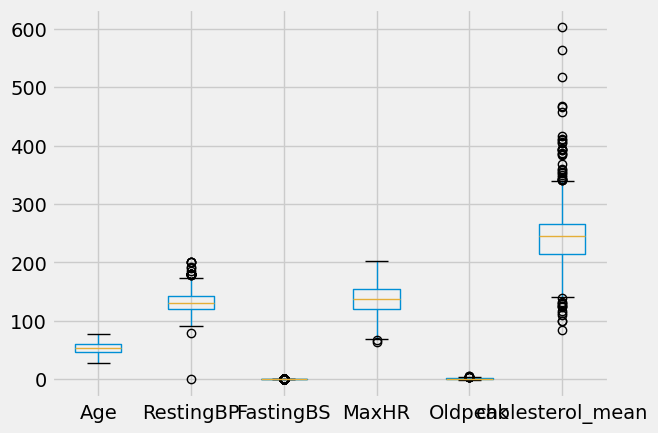

In [284]:
train_x.boxplot()

### Data Standardization

#### Standardization for train data

In [285]:
# Use standard scaling from sklearn library
from sklearn.preprocessing import StandardScaler
scaler_train = StandardScaler()
scaler_train.fit(train_x[cts_vars])

StandardScaler()

In [286]:
df_x_scaled_train = scaler_train.transform(train_x[cts_vars])
df_x_scaled_train = pd.DataFrame(df_x_scaled_train, columns=train_x[cts_vars].columns)

In [287]:
train_x.drop(columns=cts_vars, inplace=True)

In [288]:
# Concatenate along columns (axis=1)
train_x = pd.concat([train_x, df_x_scaled_train], axis=1)

In [289]:
train_x.head()

Gender ChestPainType  FastingBS RestingECG ExerciseAngina ST_Slope  \
0      M           ATA          0     Normal              N       Up   
1      M           ASY          0     Normal              N       Up   
2      M           NAP          1         ST              Y     Flat   
3      M           ASY          0        LVH              Y     Flat   
4      M           ATA          1     Normal              Y     Flat   

        Age  RestingBP     MaxHR   Oldpeak  cholesterol_mean  
0 -1.218505  -0.689006  0.722367 -0.859803         -0.854959  
1  0.041781   0.374458  0.916829  0.283831         -0.092931  
2  0.671923   0.427631 -0.561076  0.760345          1.338193  
3  0.041781  -0.476313 -1.066675  1.236859          0.408892  
4  0.146804   1.437921  0.255661  1.046253          0.892128

In [290]:
# Show boxplot for scaled predictors
train_x.boxplot()

<Axes: >

In [291]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            734 non-null    object 
 1   ChestPainType     734 non-null    object 
 2   FastingBS         734 non-null    int64  
 3   RestingECG        734 non-null    object 
 4   ExerciseAngina    734 non-null    object 
 5   ST_Slope          734 non-null    object 
 6   Age               734 non-null    float64
 7   RestingBP         734 non-null    float64
 8   MaxHR             734 non-null    float64
 9   Oldpeak           734 non-null    float64
 10  cholesterol_mean  734 non-null    float64
dtypes: float64(5), int64(1), object(5)
memory usage: 63.2+ KB


#### Standardization for test data

In [292]:
# Use standard scaling from sklearn library
from sklearn.preprocessing import StandardScaler
scaler_test = StandardScaler()
scaler_test.fit(test_x[cts_vars])

StandardScaler()

In [293]:
df_x_scaled_test = scaler_test.transform(test_x[cts_vars])
df_x_scaled_test = pd.DataFrame(df_x_scaled_test, columns=test_x[cts_vars].columns)

In [294]:
test_x.drop(columns=cts_vars, inplace=True)

In [295]:
# Concatenate along columns (axis=1)
test_x = pd.concat([test_x, df_x_scaled_test], axis=1)

In [296]:
test_x.head()

Gender ChestPainType  FastingBS RestingECG ExerciseAngina ST_Slope  \
0      M           ASY          0     Normal              Y     Down   
1      M           ASY          0         ST              N     Down   
2      F           ATA          0     Normal              N       Up   
3      M           ASY          1         ST              Y     Flat   
4      M           NAP          1     Normal              Y     Flat   

        Age  RestingBP     MaxHR   Oldpeak  cholesterol_mean  
0  1.201531   0.225198 -1.495465  2.811259          0.505433  
1  0.537289  -0.946977  0.068443  3.165797          1.385972  
2 -0.680486   0.576850 -0.137334  0.152220          0.192353  
3  1.201531   0.635459 -0.919288  0.595393         -0.062025  
4 -0.680486  -1.181413 -0.754666 -0.734126         -0.049592

<Axes: >

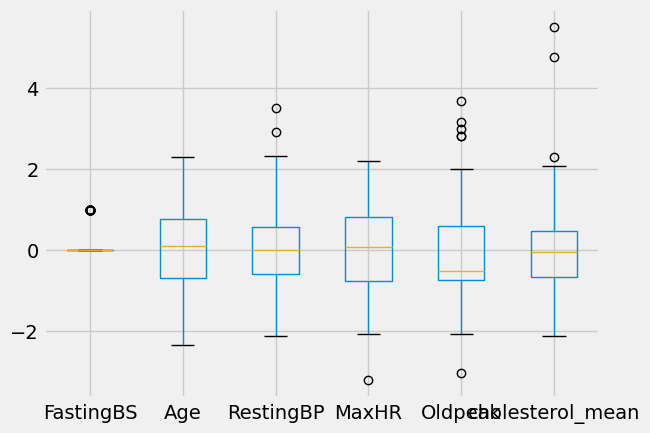

In [297]:
# Show boxplot for scaled predictors
test_x.boxplot()

#Feature Engineering

In [298]:
train_x = pd.get_dummies(train_x, columns=columns_to_check, drop_first=False, dtype=int)
train_x['Gender'] = train_x['Gender'].replace({'M': 1, 'F': 0})
train_x['ExerciseAngina'] = train_x['ExerciseAngina'].replace({'N': 0, 'Y': 1})
train_x['ST_Slope'] = train_x['ST_Slope'].replace({'Down': 0, 'Flat': 1, 'Up': 2})
train_x['RestingECG'] = train_x['RestingECG'].replace({'LVH': 0, 'Normal': 1, 'ST': 2})

train_x.head()


Gender  FastingBS  RestingECG  ExerciseAngina  ST_Slope       Age  \
0       1          0           1               0         2 -1.218505   
1       1          0           1               0         2  0.041781   
2       1          1           2               1         1  0.671923   
3       1          0           0               1         1  0.041781   
4       1          1           1               1         1  0.146804   

   RestingBP     MaxHR   Oldpeak  cholesterol_mean  ChestPainType_ASY  \
0  -0.689006  0.722367 -0.859803         -0.854959                  0   
1   0.374458  0.916829  0.283831         -0.092931                  1   
2   0.427631 -0.561076  0.760345          1.338193                  0   
3  -0.476313 -1.066675  1.236859          0.408892                  1   
4   1.437921  0.255661  1.046253          0.892128                  0   

   ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  
0                  1                  0                 0  
1                  0                  0                 0  
2                  0                  1                 0  
3                  0                  0                 0  
4                  1                  0                 0

In [299]:
test_x = pd.get_dummies(test_x, columns=columns_to_check, drop_first=False, dtype=int)
test_x['Gender'] = test_x['Gender'].replace({'M': 1, 'F': 0})
test_x['ExerciseAngina'] = test_x['ExerciseAngina'].replace({'N': 0, 'Y': 1})
test_x['ST_Slope'] = test_x['ST_Slope'].replace({'Down': 0, 'Flat': 1, 'Up': 2})
test_x['RestingECG'] = test_x['RestingECG'].replace({'LVH': 0, 'Normal': 1, 'ST': 2})

test_x.head()

Gender  FastingBS  RestingECG  ExerciseAngina  ST_Slope       Age  \
0       1          0           1               1         0  1.201531   
1       1          0           2               0         0  0.537289   
2       0          0           1               0         2 -0.680486   
3       1          1           2               1         1  1.201531   
4       1          1           1               1         1 -0.680486   

   RestingBP     MaxHR   Oldpeak  cholesterol_mean  ChestPainType_ASY  \
0   0.225198 -1.495465  2.811259          0.505433                  1   
1  -0.946977  0.068443  3.165797          1.385972                  1   
2   0.576850 -0.137334  0.152220          0.192353                  0   
3   0.635459 -0.919288  0.595393         -0.062025                  1   
4  -1.181413 -0.754666 -0.734126         -0.049592                  0   

   ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  
0                  0                  0                 0  
1                  0                  0                 0  
2                  1                  0                 0  
3                  0                  0                 0  
4                  0                  1                 0

## Correlation Analaysis

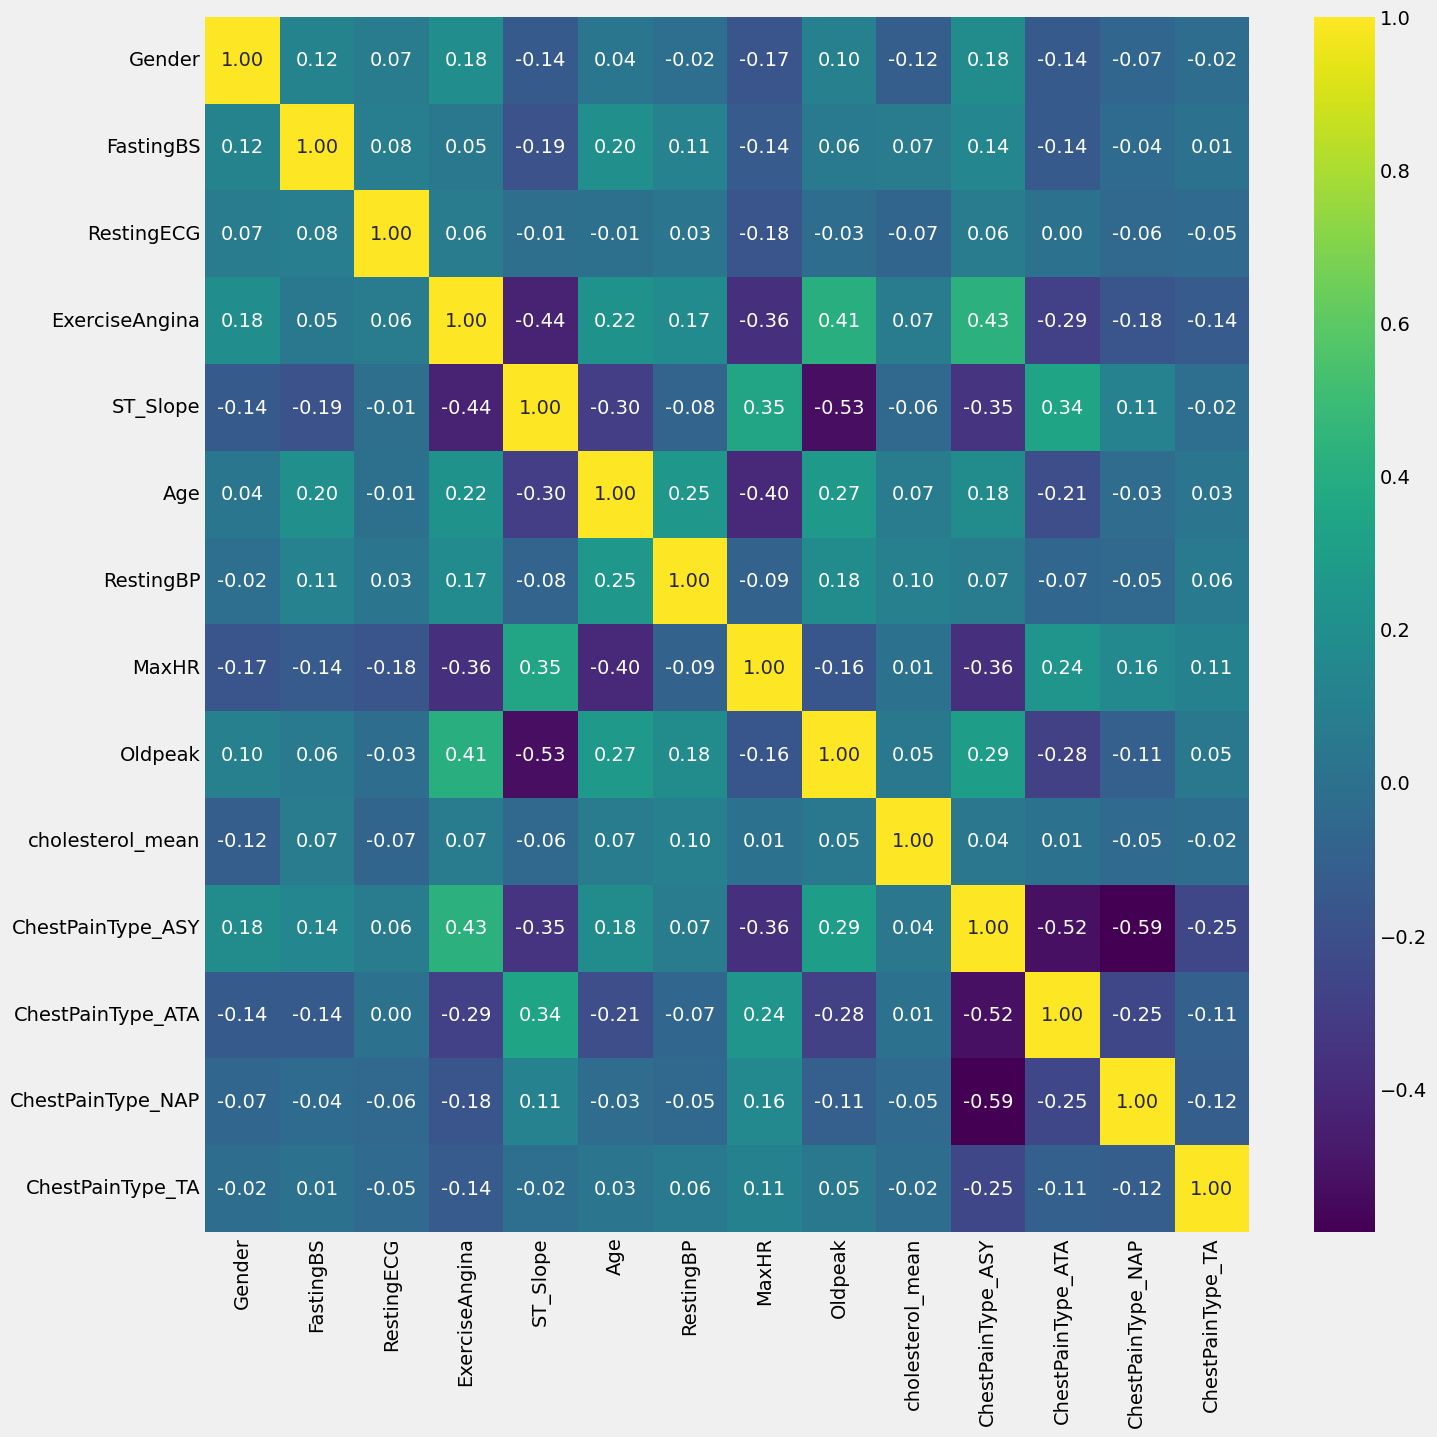

In [300]:
#Colerration check.
plt.style.use('fivethirtyeight')
corr = train_x.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(train_x.corr(),annot=True,fmt = ".2f",cmap='viridis')
plt.show()

In [301]:
# Extracting highly correlated variables
def get_highly_correlated_pairs(corr_matrix, threshold=0.8):
    # Create a mask to ignore the diagonal and lower triangle
    mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
    corr_matrix = corr_matrix.where(mask)

    # Extract variable pairs with correlation above the threshold
    highly_correlated_pairs = [(corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j])
                               for i in range(corr_matrix.shape[0])
                               for j in range(i + 1, corr_matrix.shape[1])
                               if abs(corr_matrix.iloc[i, j]) > threshold]

    return highly_correlated_pairs

# Get the highly correlated pairs
high_corr_pairs = get_highly_correlated_pairs(corr, threshold=0.8)

# Print the highly correlated pairs
for pair in high_corr_pairs:
    print(f"Variables: {pair[0]} and {pair[1]} with correlation: {pair[2]:.2f}")

# Modeling

## Logistic regression

In [302]:
from sklearn.linear_model import LogisticRegression

In [303]:
reg = LogisticRegression()
reg.fit(train_x,train_y)

LogisticRegression()

In [304]:
# Training accuracy
Y_train_predict = reg.predict(train_x)
# Validation accuracy
Y_val_predict = reg.predict(test_x)


In [305]:
explainer = shap.Explainer(reg.predict, train_x)
shap_values = explainer(train_x)

PermutationExplainer explainer: 735it [01:29,  7.60it/s]


In [306]:
shap.initjs()
shap.plots.bar(shap_values)

### Evaluation Metrics

#### Classification Accuracy

In [307]:
from sklearn.metrics import accuracy_score

# Error calculation
error_train = accuracy_score(Y_train_predict, train_y)
print('Training Classif Accuracy: ' + str(error_train))
error_val = accuracy_score(Y_val_predict, test_y)
print('Validation Classif Accuracy: ' + str(error_val))

Training Classif Accuracy: 0.8583106267029973
Validation Classif Accuracy: 0.8478260869565217


#### Confusion Matrix

In [308]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_val_predict, test_y)

In [309]:
print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[70 16]
 [12 86]]

True Positives(TP) =  70

True Negatives(TN) =  86

False Positives(FP) =  16

False Negatives(FN) =  12


Text(0.5, 1.0, 'Confusion Matrix Heatmap for Logistic Regression')

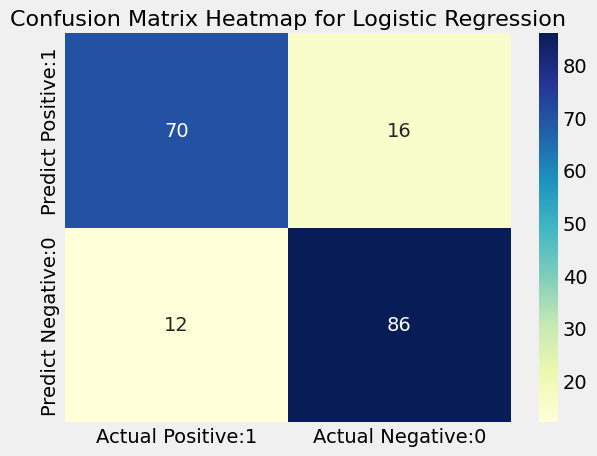

In [310]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

heatmap = sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

heatmap.set_title('Confusion Matrix Heatmap for Logistic Regression', fontsize=16)

#### F1-Score

In [311]:
from sklearn.metrics import f1_score

# Error calculation
error_train = f1_score(Y_train_predict, train_y)
print('Training F1 Score: ' + str(error_train))
error_val = f1_score(Y_val_predict, test_y)
print('Validation F1 Score: ' + str(error_val))

Training F1 Score: 0.87409200968523
Validation F1 Score: 0.86


#### Classification Report

In [312]:
from sklearn.metrics import classification_report

report = classification_report(Y_train_predict, train_y)
print('Training report\n', report)

report = classification_report(Y_val_predict, test_y)
print('Validation report\n', report)

Training report
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       314
           1       0.89      0.86      0.87       420

    accuracy                           0.86       734
   macro avg       0.85      0.86      0.86       734
weighted avg       0.86      0.86      0.86       734

Validation report
               precision    recall  f1-score   support

           0       0.85      0.81      0.83        86
           1       0.84      0.88      0.86        98

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



#### AUC and ROC Curve

In [313]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

auc = roc_auc_score(test_y, Y_val_predict)
fpr, tpr, thresholds = roc_curve(test_y, Y_val_predict, pos_label=1)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlim(0, 1.01)
plt.ylim(0, 1.01)
plt.title('ROC Curve for log. regression AUC: {}'.format(round(auc, 2)))
plt.show()

## GridSearch based parameter tuning for Decision tree

In [314]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': [6, 8, 10, 11, 12], 'min_samples_split': [2, 3, 4]}
decision_tree = DecisionTreeClassifier(random_state=5)

grid_search_cv = GridSearchCV(decision_tree, params, verbose=1, cv=10)
grid_search_cv.fit(train_x, train_y)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=5),
             param_grid={'max_leaf_nodes': [6, 8, 10, 11, 12],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [315]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=8, random_state=5)

In [316]:
# Using best parameters from GridSearch
selection = DecisionTreeClassifier(**grid_search_cv.best_params_)

selection.fit(train_x, train_y)
Y_train_predict = selection.predict(train_x)
Y_test_predict = selection.predict(test_x)

In [317]:
grid_search_cv.best_params_

{'max_leaf_nodes': 8, 'min_samples_split': 2}

In [318]:
explainer = shap.Explainer(selection.predict, train_x)
shap_values = explainer(train_x)

PermutationExplainer explainer: 735it [00:30, 16.10it/s]                         


In [319]:
shap.initjs()
shap.plots.bar(shap_values)

### Evaluation Metrics

#### Classification Accuracy

In [320]:
from sklearn.metrics import accuracy_score

# Error calculation
error_train = accuracy_score(Y_train_predict, train_y)
print('Training Classif Accuracy: ' + str(error_train))
error_val = accuracy_score(Y_test_predict, test_y)
print('Validation Classif Accuracy: ' + str(error_val))

Training Classif Accuracy: 0.8664850136239782
Validation Classif Accuracy: 0.8478260869565217


#### Confusion Matrix

In [321]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test_predict, test_y)

In [322]:
print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[72 18]
 [10 84]]

True Positives(TP) =  72

True Negatives(TN) =  84

False Positives(FP) =  18

False Negatives(FN) =  10


Text(0.5, 1.0, 'Confusion Matrix Heatmap for Decision Tree')

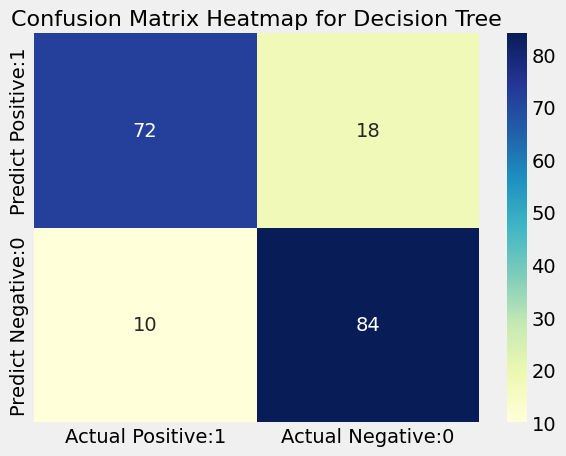

In [323]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

heatmap = sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

heatmap.set_title('Confusion Matrix Heatmap for Decision Tree', fontsize=16)



#### F1-Score

In [324]:
from sklearn.metrics import f1_score

# Error calculation
error_train = f1_score(Y_train_predict, train_y)
print('Training F1 Score: ' + str(error_train))
error_val = f1_score(Y_test_predict, test_y)
print('Validation F1 Score: ' + str(error_val))

Training F1 Score: 0.880195599022005
Validation F1 Score: 0.8571428571428571


#### Classification Report

In [325]:
from sklearn.metrics import classification_report

report = classification_report(Y_train_predict, train_y)
print('Training report\n', report)

report = classification_report(Y_test_predict, test_y)
print('Validation report\n', report)

Training report
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       322
           1       0.89      0.87      0.88       412

    accuracy                           0.87       734
   macro avg       0.86      0.87      0.86       734
weighted avg       0.87      0.87      0.87       734

Validation report
               precision    recall  f1-score   support

           0       0.88      0.80      0.84        90
           1       0.82      0.89      0.86        94

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



#### AUC and ROC Curve

In [326]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

auc = roc_auc_score(test_y, Y_test_predict)
fpr, tpr, thresholds = roc_curve(test_y, Y_test_predict, pos_label=1)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlim(0, 1.01)
plt.ylim(0, 1.01)
plt.title('ROC Curve for Decision Tree AUC: {}'.format(round(auc, 2)))
plt.show()

## GridSearch based parameter tuning for Neural Network

In [327]:
# from sklearn.neural_network import MLPClassifier
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid
# params = {'hidden_layer_sizes': [ 8, 10, 15, 20], 'max_iter': [1000, 1250, 1500, 2000]}

# # Create the neural network classifier
# neural_network = MLPClassifier(random_state=5)

# # Perform GridSearchCV
# grid_search_cv = GridSearchCV(neural_network, params, verbose=1, cv=10)
# grid_search_cv.fit(train_x, train_y)


In [328]:
# grid_search_cv.best_estimator_

In [329]:
# # Using best parameters from GridSearch
# selection = MLPClassifier(**grid_search_cv.best_params_)

# selection.fit(train_x, train_y)
# Y_train_predict = selection.predict(train_x)
# Y_test_predict = selection.predict(test_x)

In [330]:
# grid_search_cv.best_params_

**Every time we run the Grid search parameter-based code for the Neural Network, it gives varying evaluation metrics. To address this inconsistency, we have used the following code for further analysis.**

In [331]:
from sklearn.neural_network import MLPClassifier
selection = MLPClassifier(hidden_layer_sizes=10, max_iter=1000, random_state = 5)

In [332]:
selection.fit(train_x, train_y)

MLPClassifier(hidden_layer_sizes=10, max_iter=1000, random_state=5)

In [333]:
selection.fit(train_x, train_y)
Y_train_predict = selection.predict(train_x)
Y_test_predict = selection.predict(test_x)

In [334]:
test_x.head()

Gender  FastingBS  RestingECG  ExerciseAngina  ST_Slope       Age  \
0       1          0           1               1         0  1.201531   
1       1          0           2               0         0  0.537289   
2       0          0           1               0         2 -0.680486   
3       1          1           2               1         1  1.201531   
4       1          1           1               1         1 -0.680486   

   RestingBP     MaxHR   Oldpeak  cholesterol_mean  ChestPainType_ASY  \
0   0.225198 -1.495465  2.811259          0.505433                  1   
1  -0.946977  0.068443  3.165797          1.385972                  1   
2   0.576850 -0.137334  0.152220          0.192353                  0   
3   0.635459 -0.919288  0.595393         -0.062025                  1   
4  -1.181413 -0.754666 -0.734126         -0.049592                  0   

   ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  
0                  0                  0                 0  
1                  0                  0                 0  
2                  1                  0                 0  
3                  0                  0                 0  
4                  0                  1                 0

In [335]:
Y_test_predict[0:5]

array([1, 1, 0, 1, 1])

### Evaluation Metrics

#### Classification Accuracy

In [336]:
from sklearn.metrics import accuracy_score

# Error calculation
error_train = accuracy_score(Y_train_predict, train_y)
print('Training Classif Accuracy: ' + str(error_train))
error_val = accuracy_score(Y_test_predict, test_y)
print('Validation Classif Accuracy: ' + str(error_val))

Training Classif Accuracy: 0.896457765667575
Validation Classif Accuracy: 0.8586956521739131


#### Confusion Matrix

In [337]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test_predict, test_y)

In [338]:
print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[71 15]
 [11 87]]

True Positives(TP) =  71

True Negatives(TN) =  87

False Positives(FP) =  15

False Negatives(FN) =  11


Text(0.5, 1.0, 'Confusion Matrix Heatmap for Neural Network')

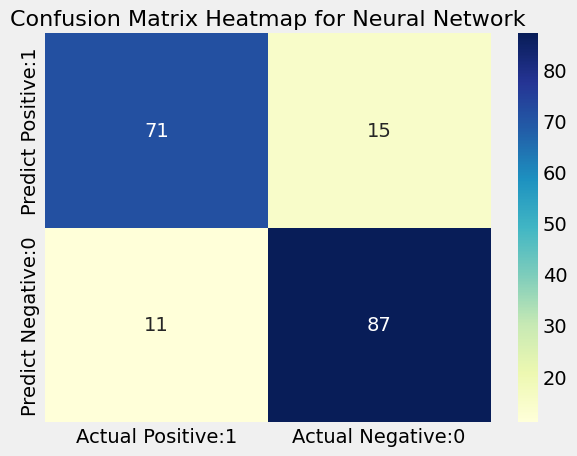

In [339]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

heatmap = sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

heatmap.set_title('Confusion Matrix Heatmap for Neural Network', fontsize=16)

#### F1-Score

In [340]:
from sklearn.metrics import f1_score

# Error calculation
error_train = f1_score(Y_train_predict, train_y)
print('Training F1 Score: ' + str(error_train))
error_val = f1_score(Y_test_predict, test_y)
print('Validation F1 Score: ' + str(error_val))

Training F1 Score: 0.9077669902912622
Validation F1 Score: 0.87


#### Classification Report

In [341]:
from sklearn.metrics import classification_report

report = classification_report(Y_train_predict, train_y)
print('Training report\n', report)

report = classification_report(Y_test_predict, test_y)
print('Validation report\n', report)

Training report
               precision    recall  f1-score   support

           0       0.87      0.90      0.88       316
           1       0.92      0.89      0.91       418

    accuracy                           0.90       734
   macro avg       0.89      0.90      0.89       734
weighted avg       0.90      0.90      0.90       734

Validation report
               precision    recall  f1-score   support

           0       0.87      0.83      0.85        86
           1       0.85      0.89      0.87        98

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



#### AUC and ROC Curve

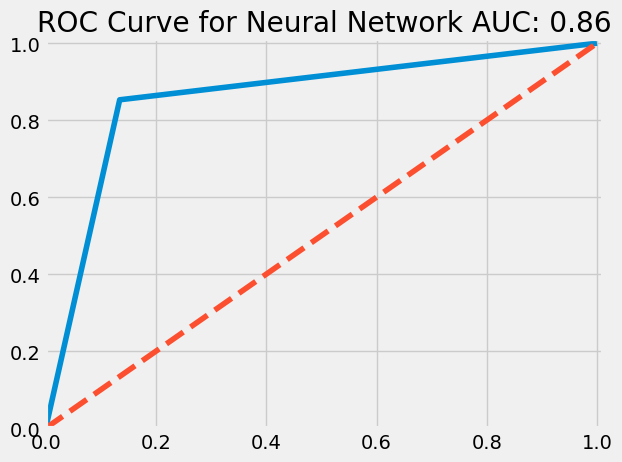

In [342]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

auc = roc_auc_score(test_y, Y_test_predict)
fpr, tpr, thresholds = roc_curve(test_y, Y_test_predict, pos_label=1)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlim(0, 1.01)
plt.ylim(0, 1.01)
plt.title('ROC Curve for Neural Network AUC: {}'.format(round(auc, 2)))
plt.show()

## XGBoost

In [343]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(train_x, train_y)
Y_test_predict = xgb_model.predict(test_x)
Y_train_predict = xgb_model.predict(train_x)

In [344]:
explainer = shap.Explainer(xgb_model.predict, train_x)
shap_values = explainer(train_x)

PermutationExplainer explainer: 735it [02:13,  5.04it/s]


In [345]:
shap.initjs()
shap.plots.bar(shap_values)

### Evaluation Metrics

#### Classification Accuracy

In [346]:
from sklearn.metrics import accuracy_score

# Error calculation
error_train = accuracy_score(Y_train_predict, train_y)
print('Training Classif Accuracy: ' + str(error_train))
error_val = accuracy_score(Y_test_predict, test_y)
print('Validation Classif Accuracy: ' + str(error_val))

Training Classif Accuracy: 1.0
Validation Classif Accuracy: 0.8043478260869565


#### Confusion Matrix

In [347]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test_predict, test_y)

In [348]:
print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[72 26]
 [10 76]]

True Positives(TP) =  72

True Negatives(TN) =  76

False Positives(FP) =  26

False Negatives(FN) =  10


In [349]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

heatmap = sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

heatmap.set_title('Confusion Matrix Heatmap for XGboost', fontsize=16)

Text(0.5, 1.0, 'Confusion Matrix Heatmap for XGboost')

#### F1-Score

In [350]:
from sklearn.metrics import f1_score

# Error calculation
error_train = f1_score(Y_train_predict, train_y)
print('Training F1 Score: ' + str(error_train))
error_val = f1_score(Y_test_predict, test_y)
print('Validation F1 Score: ' + str(error_val))

Training F1 Score: 1.0
Validation F1 Score: 0.8085106382978724


#### Classification Report

In [351]:
from sklearn.metrics import classification_report

report = classification_report(Y_train_predict, train_y)
print('Training report\n', report)

report = classification_report(Y_test_predict, test_y)
print('Validation report\n', report)

Training report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       328
           1       1.00      1.00      1.00       406

    accuracy                           1.00       734
   macro avg       1.00      1.00      1.00       734
weighted avg       1.00      1.00      1.00       734

Validation report
               precision    recall  f1-score   support

           0       0.88      0.73      0.80        98
           1       0.75      0.88      0.81        86

    accuracy                           0.80       184
   macro avg       0.81      0.81      0.80       184
weighted avg       0.82      0.80      0.80       184



#### AUC and ROC Curve

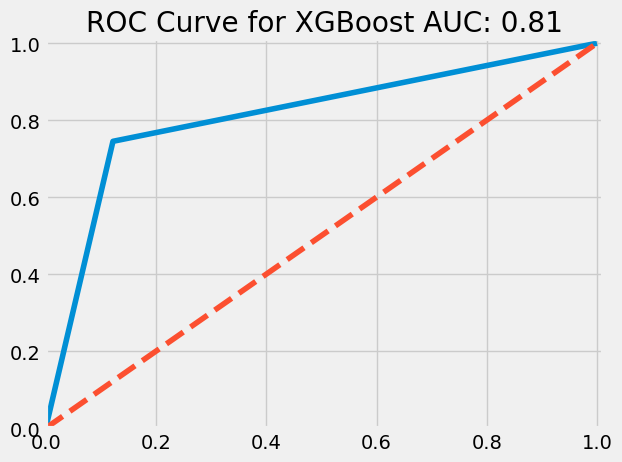

In [352]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

auc = roc_auc_score(test_y, Y_test_predict)
fpr, tpr, thresholds = roc_curve(test_y, Y_test_predict, pos_label=1)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlim(0, 1.01)
plt.ylim(0, 1.01)
plt.title('ROC Curve for XGBoost AUC: {}'.format(round(auc, 2)))
plt.show()

## Model comparison

image.png

##Model explainability

### SHAP Explainer

In [353]:
explainer = shap.Explainer(selection.predict, train_x)
shap_values = explainer(train_x)

PermutationExplainer explainer: 735it [00:55, 10.90it/s]


In [354]:
record_id = 4

print('Actual values:')
print(train_x.iloc[record_id,:])

print('Survival Status:')
print(train_y.iloc[record_id,:])
shap.initjs()

shap.plots.force(shap_values[record_id])

Actual values:
Gender               1.000000
FastingBS            1.000000
RestingECG           1.000000
ExerciseAngina       1.000000
ST_Slope             1.000000
Age                  0.146804
RestingBP            1.437921
MaxHR                0.255661
Oldpeak              1.046253
cholesterol_mean     0.892128
ChestPainType_ASY    0.000000
ChestPainType_ATA    1.000000
ChestPainType_NAP    0.000000
ChestPainType_TA     0.000000
Name: 4, dtype: float64
Survival Status:
HeartDisease    1
Name: 4, dtype: int64


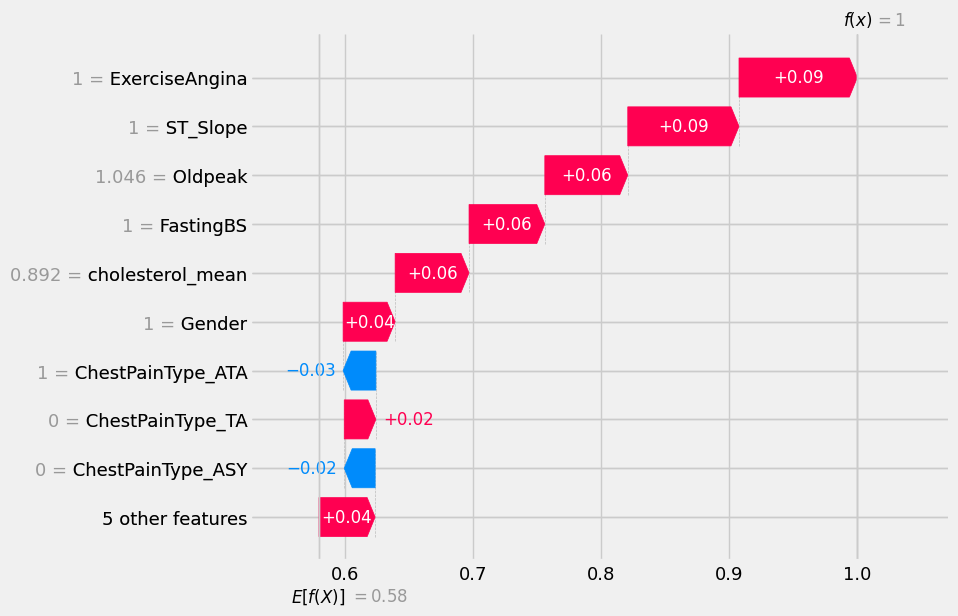

In [355]:
# visualize the prediction of given record id
shap.plots.waterfall(shap_values[record_id])

In [356]:
# Looks like Google Colab needs shap.initjs() in every cell where there is a visualization.
shap.initjs()
shap.plots.force(shap_values)

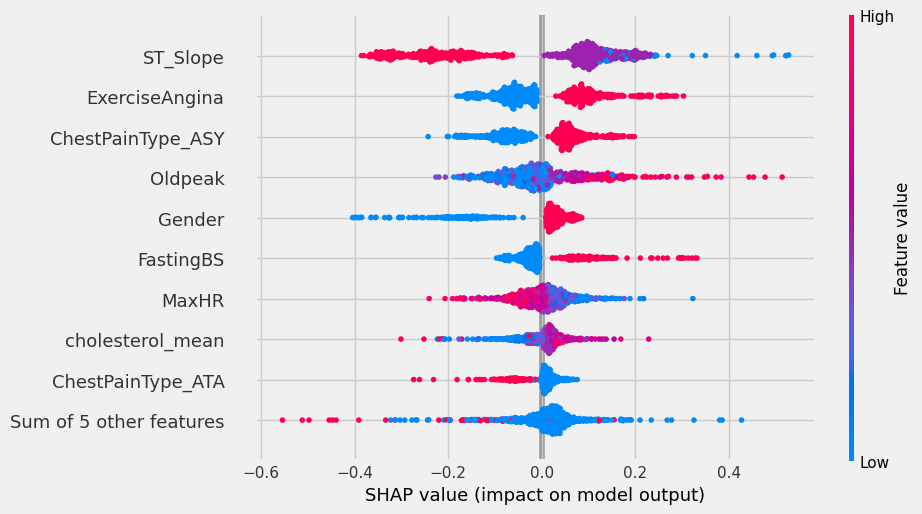

In [357]:
# summarize the effects of all the features
shap.initjs()
shap.plots.beeswarm(shap_values)

In [358]:
shap.initjs()
shap.plots.bar(shap_values)

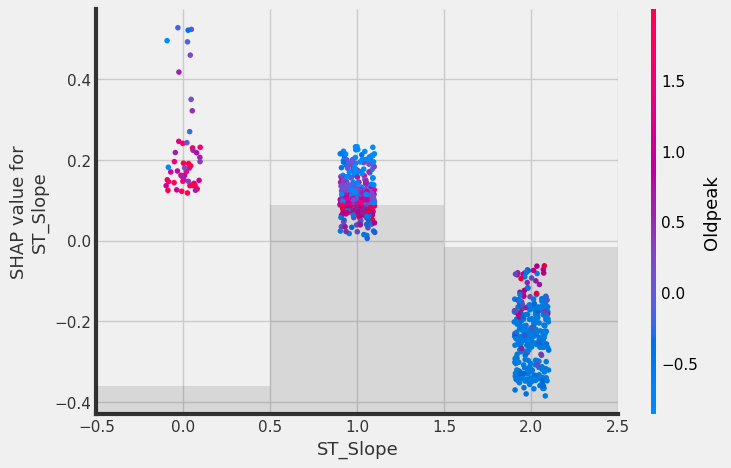

In [359]:
shap.plots.scatter(shap_values[:,"ST_Slope"], color=shap_values[:,"Oldpeak"])

In [360]:
shap.plots.scatter(shap_values[:,"ST_Slope"], color=shap_values[:,"ExerciseAngina"])

In [362]:
shap.plots.scatter(shap_values[:,"Age"], color=shap_values[:,"Age"])

In [363]:
shap.plots.scatter(shap_values[:,"Oldpeak"], color=shap_values[:,"Oldpeak"])

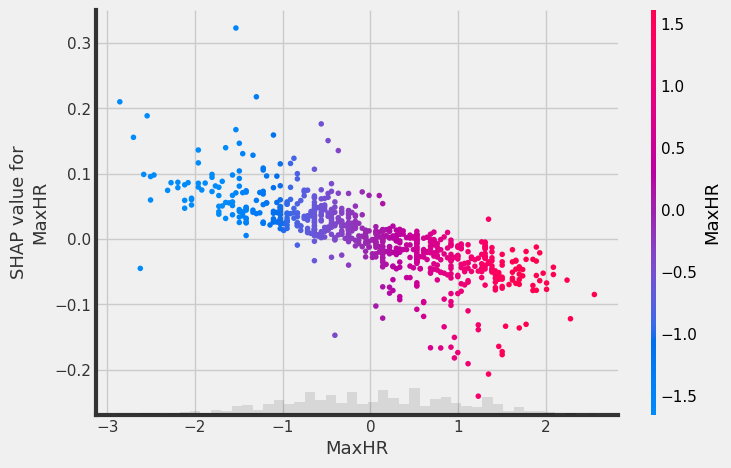

In [364]:
shap.plots.scatter(shap_values[:,"MaxHR"], color=shap_values[:,"MaxHR"])